# Décomposition d'un signal dans le temps et en fréquence



Prenons un système dont ma réponse impulsionnelle est $h(t)=e^{-a.|t|}.u(|t|)$


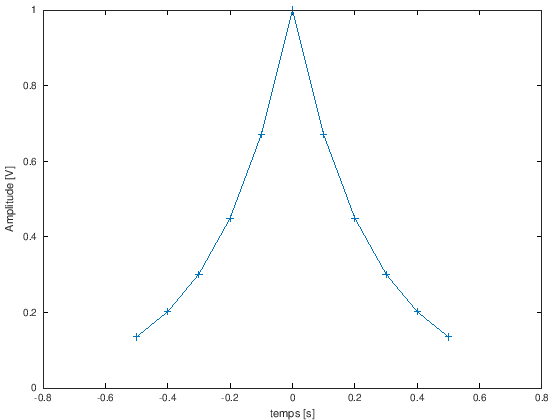

In [501]:
clear all
close all
clc

%% Fonctions usuelles
u = @(t) (t>=0) + 0*(t==0) ;

a=4;
h = @(t) exp(-a*abs(t)).*u(abs(t));

%% Vecteur temps
Te=0.1; tmin=-5*Te; tmax= 5*Te; temps=tmin:Te:tmax ;

plot(temps,h(temps),'+-')
xlabel('temps [s]')
ylabel('Amplitude [V]')


On peut le décomposer dans une base temporelle faites d'impulsions localisée à chaque instant :
$x(t) = \int x(\tau) \delta_{\tau}(t) dt$

Où chaque composante du signal $x(\tau)$ est la mesure de $x$ faite à l'instant $\tau$ obtenue en faisant un produit scalaire avec la fonction de base $\delta_{\tau}$. Donc $<x,\delta_{\tau}> = \int x(t).\delta_{\tau}(t) .dt$ est la composante du vecteur $x$ décomposé dans la base temporelle $T=\left(\delta_{\tau}\right)_{\tau\in\R}$

Le signal est donc décomposé par :
$$ \vect{x}=\vvvectBase{\ldots}{<\vect{x},\delta_{\tau}>=x(\tau)}{\dots}{T}$$

Faisons-le mais avec une résolution temporelle finie en calcul numérique.

---
# Base temporelle
---
On décompose le signal dans une base temporelle, la plus fine possible de résolution $\Delta_t=T_e$ que l'on va prendre égale à la fréquence d'échantillonnage temporelle.

Une vecteur de la base est donc une impulsion de largeur $\def\Dt{\Delta_t}\Dt$ centrée sur un instant $\tau$ servant d'indice du vecteur de la base.

On note une de ces impulsions $\def\wt{w_{\tau}}\wt$ de la base temporelle $W_{\tau}=\left(\wt\right)_{\tau}$ avec :
$$\wt : t \mapsto \Pi_{\Dt}(t-\tau)$$

En simulation on prend $\Dt=T_e$ et $N$ vecteurs donc la base est calculée pour $\tau = k\Dt , \quad k\in \llbracket 0, N\llbracket$

In [503]:
Dt=2*Te;  % Dt, résolution temporelle 
N=3;   % Nombre de vecteurs de la base temporelle

% Dt est un paramètre connu par toutes les fonctions suivantes
eps=1e-6; % Attention aux comparaisons avec les flottants !
porte = @(t,L) (t >= -(L/2)-eps) .* (t <(L/2)-eps);
wTau = @(t,tau) porte(t-tau,Dt+1e-6);

tau = (0:(N-1)) * Dt ; % échantillon de la base temporelle


% Wt = Matrice de la base 
% contenant dans chaque colonne un vecteur vertical 
%   de la base temporelle
% ----------->tau
% |     .           .
% |  wTau(t)    wTau+Dt(t)
% |     .           .
% V     .           .
% t
t=temps';  % le temps t est vertical maintenant
Wtau = wTau(t,tau)   % matrice car tau est ligne et t' colonne



Wtau =

   0   0   0
   0   0   0
   0   0   0
   0   0   0
   1   0   0
   1   0   0
   0   1   0
   0   1   0
   0   0   1
   0   0   1
   0   0   0



Chaque colonne est un signal temporel de $t$ localisé autour d'un instant $\tau$.

Traçons-les :

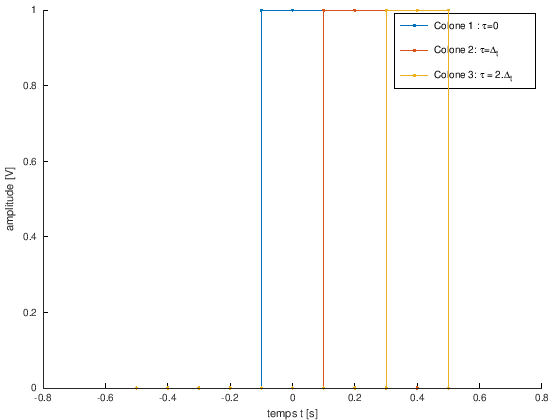

In [504]:
stairs(t,Wtau,'.-'); box off;
legend('Colone 1 : \tau=0', 'Colone 2: \tau=\Delta_t', 'Colone 3: \tau = 2.\Delta_t')
xlabel('temps t [s]')
ylabel('amplitude [V]')

## Base orthogonale
---

On peut vérifier que chaque vecteur (contenu en colonne) est orthogonal à un autre en faisant le produit scalaire $ <f,g> = \int \overline{f(t)}.g(t).dt$

Pour cela il suffit de prendre un vecteur $\wt$ ligne des valeur conjuguées (contenu dans la transposée conjuguée ```Wtau'```)   
et de le multiplier par un vecteur en colone $w_{\tau'}$ (contenu dans```Wtau```)

Ainsi on doit obtenir le produit scalaire $<\wt,w_{\tau'}> = 0$ pour $\tau\neq\tau'$

In [505]:
# Calculons pour le 2eme vecteur et le 3ième 
# donc le vecteur 2 en ligne conjugué * vecteur 3 en colonne
w3_scal_w4 = Wtau(:,2)' * Wtau(:,3)

# On peut les calculer tous avec 
scalaires = Wtau' * Wtau


w3_scal_w4 = 0
scalaires =

   2   0   0
   0   2   0
   0   0   2



La base est donc orthogonale puisque à aucun instant deux vecteurs sont non-nul en même temps.


## Base normée
---

On voit bien que les vecteurs sont orthogonaux, car les produits scalaires pour des $\tau$ différents sont ceux **hors diagonale**. 

**Sur la diagonale,** se trouvent les produits $<\wt, \wt> = \| \wt\|^2 = \Dt^2$ car les signaux $\wt$ valent $1$ uniquement sur un intervale de largeur $\Dt$. On associe cette norme au carré à la puissance moyenne du signal sur la durée d'observation (durée du vecteur ```t```) .

La base n'est pas normée, corrigeons-là pour obtenir une b.o.n. On obtiendra alors une matrice dite orthogonale (**piège d'appelation :** une **matrice est orthogonale** si ces vecteurs lignes ou colonnes forment une b.o.**N**). 

Et nous aurons donc la matrice $W_t = \left(\frac{1}{\Dt}.\wt(t)\right)_{t,\tau}$ de transformation inverse facilement car  : 

$\overline{W_t'}.W_t = I_d \;\implies\; W_t^{-1} = \overline{W_t'}$


In [507]:
Wtau = Wtau / sqrt(Wtau' * Wtau)  % en matlab A' est la transpose du conjugué de A

scalaires = Wtau'*Wtau

inv(Wtau)

Wtau =

   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000
   0.70711   0.00000   0.00000
   0.70711   0.00000   0.00000
   0.00000   0.70711   0.00000
   0.00000   0.70711   0.00000
   0.00000   0.00000   0.70711
   0.00000   0.00000   0.70711
   0.00000   0.00000   0.00000

scalaires =

   1.00000   0.00000   0.00000
   0.00000   1.00000   0.00000
   0.00000   0.00000   1.00000

error: inverse: A must be a square matrix


Remarquons que l'on a construit une matrice ```Wtau``` qui n'est pas carrée (car il y a deux fois plus de points pour le  vecteur $t$ en rangées que pour le vecteur $\tau$ en colonnes car $\Dt = 2 T_e$).

Et donc l'inverse de $W_{\tau}$  n'existe pas, on parle dans ce cas de **pseudo-inverse à gauche $W_{\tau}^*$** car le produit et la propriété $W_{\tau}^* . W_{\tau} = Id$ est conservée.


## Décomposition temporelle et recomposition
---

On peut maitenant décomposer le signal $x$ dans la base temporelle $W_{\tau}$, en calculant le produit scalaire $<\wt,x>$ (on prend la convention du "bra" à gauche qui est le conjugué et du "cket" à droite sans conjugué pour nos "brackets" : cela cole avec le produit matriciel et les physiciennes).

On calcule tous les coefficients de $x$ dans la base $W_{\tau}$ en faisant un seul produit matriciel par la gauche, on obtient ainsi la transformée temporelle de $x$ notée $\check{X}$ :

$\check{X}(\tau) = <\wt, x>$

On recompose le signal en faisant la somme des composantes :

$x \approx \sum_\tau \check{X}(\tau) . \wt{}$

Pour cela on fait l'opération inverse de décomposition (multiplier à gauche par $W_{\tau}'$) en multipliant par l'inverse :

$ x \approx  W_{\tau}. \check{X} = W_{\tau}.W_{\tau}'.x = I_d . x = x $

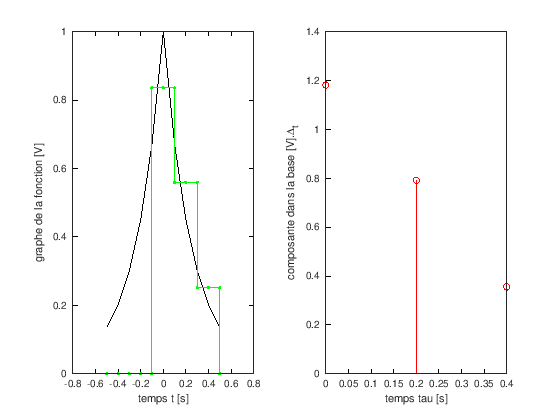

In [508]:
x_de_t = h(t);
X_de_tau = Wtau'*x_de_t;
x_recomp = Wtau * X_de_tau;

subplot(121)

plot(t,x_de_t,'k'); hold on;
stairs(t,x_recomp,'g.-')
xlabel('temps t [s]')
ylabel('graphe de la fonction [V]')
subplot(122)
stem(tau,X_de_tau,'r'); 
xlabel('temps tau [s]')
ylabel('composante dans la base [V].\Delta_t')

On peut mesurer l'erreur entre le reconstitué et l'original en utilisant la norme comme mesure.

$\| x - W_{\tau}.\check{X}\|$ pour avoir la puissance moyenne de l'erreur de reconstruction.

In [509]:
erreur_de_t = x_de_t - x_recomp ;
pmoy_erreur = erreur_de_t'*erreur_de_t
pmoy_x = x_de_t' * x_de_t
erreur_relative_pour_cent = pmoy_erreur/pmoy_x * 100

pmoy_erreur =  0.45370
pmoy_x =  2.6020
erreur_relative_pour_cent =  17.436


On peut affiner en mettant un grand nombre de points dans $t$ et dans $\tau$ pour se rapprocher du signal continu :



Nt =  400
Ntau =  40


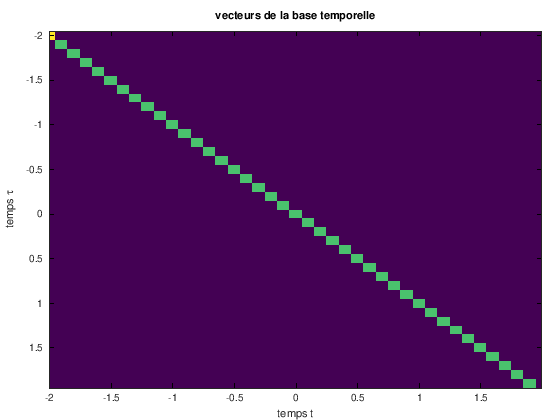

In [512]:
% vecteurs temps t très fin et vecteur base de temps tau 10 fois plus grossier
Te=1/100; temps = -2:Te:2-Te; t=temps'; Nt=length(t)
tau = t(1:10:length(t))'; Dt = tau(2)-tau(1); Ntau = length(tau)

% Vecteur et matrice de passage
Wtau = porte(t-tau,Dt);
Wtau = Wtau /sqrt(Wtau'*Wtau); #normalisation
Wtau_inverse = conj(Wtau');

imagesc(t,tau,(Wtau'));
xlabel('temps t')
ylabel('temps \tau')
title('vecteurs de la base temporelle')

pmoy_erreur =  0.24740
pmoy_x =  25.013
erreur_relative_pour_cent =  0.98908


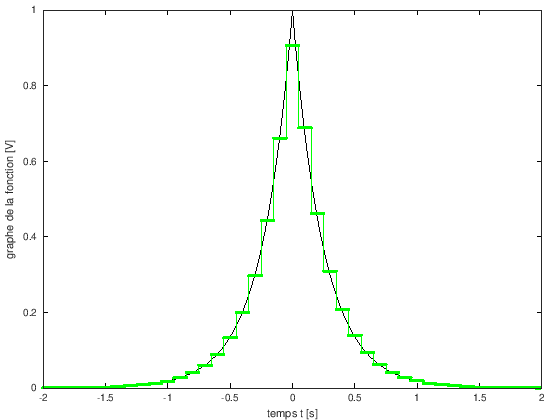

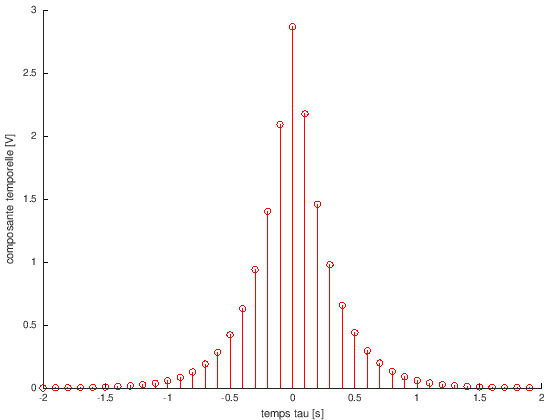

In [515]:
% représentations de x avec cette base plus fine

x_de_t =  h(t);                % coordonnées dans la base fine
X_de_tau = Wtau_inverse * x_de_t; % coordonnées dans la base grossière
x_de_t_reconstruit = Wtau * X_de_tau ;% signal reconstruit grossièrement


plot(t,x_de_t,'k'); hold on;
stairs(t,x_de_t_reconstruit,'g.-')
xlabel('temps t [s]')
ylabel('graphe de la fonction [V]')
figure()
stem(tau,X_de_tau,'r')
xlabel('temps tau [s]')
ylabel('composante temporelle [V]')

erreur_de_t = x_de_t - x_de_t_reconstruit ;
pmoy_erreur = erreur_de_t'*erreur_de_t
pmoy_x = x_de_t' * x_de_t
erreur_relative_pour_cent = pmoy_erreur/pmoy_x * 100

---
# Décomposition fréquencielle
---

Dans ce cas les vecteurs de la base sont $w_f : t \mapsto e^{i2\pi.f.t}$ et la base est $W_f=\left(w_f\right)_f$

Pour des fonctions périodiques de période $T_0$, seules les fréquences $k.f_0$ sont utiles : donc la résolution de l'échantillonnage fréquentiel est $\Delta_f = \frac{1}{T_0}=f_0$.  

On va prendre 10 fois moins de vecteurs en fréquences pour faire une base aussi grossière que la base temporelle.



Nt =  400
tmin = -2
tmax =  1.9900
T0 =  4
Nf =  40
fmin = -4.7500
fmax =  5


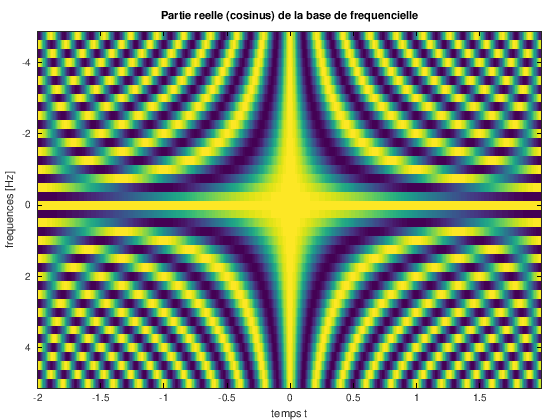

In [521]:
wf = @(t, f) exp(i*2*pi*t*f) ; 

Nt = length(t)
tmin=t(1)
tmax=t(end)

Nf = floor(Nt/10);          % 10 fois plus grossier
T0 = Nt*Te; F0=1/T0; Df=F0;
T0
f = (0:(Nf-1))*Df; % Nf fréquence positives de résolution Df
f=f-f(Nf/2);  % On décale pour avoir des fréquences négative car ondes complexes
Nf=length(f)
fmin=f(1)
fmax=f(end)

Wf = wf(t,f);
imagesc(t,f,real(Wf')); 
xlabel('temps t')
ylabel('frequences [Hz]')
title('Partie reelle (cosinus) de la base de frequencielle')

## On vérifie que Wf est b.o.n

module =  400.00


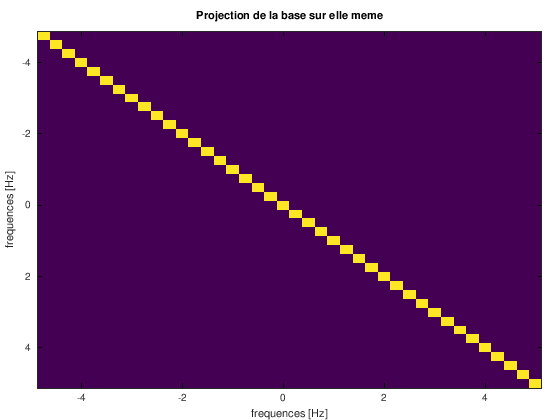

In [522]:
scalaires = Wf'*Wf;
imagesc(f,f,abs(scalaires));
xlabel('frequences [Hz]')
ylabel('frequences [Hz]')
title('Projection de la base sur elle meme')
module = max(max(abs(scalaires)))

C'est juste une b.o, faisons-en une b.o.n :

In [523]:
Wf = Wf / sqrt(module);
Wf_inverse= Wf';
scalaires = Wf'*Wf;
diagonale= max(max(abs(scalaires)))

diagonale =  1.0000


# Décomposition fréquencielle et recomposition


pmoy_erreur =  0.022599
pmoy_x =  25.013
erreur_relative_pour_cent =  0.090350


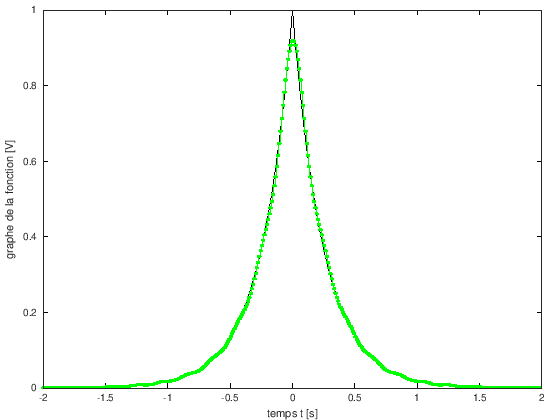

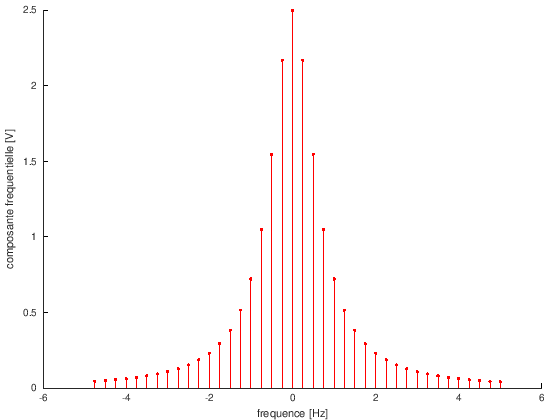

In [524]:
% représentations de x
x_de_t =  h(t);                % coordonnées dans la base fine temporelle
X_de_f = Wf_inverse * x_de_t; % coordonnées dans la base grossière fréquentielle
x_de_t_reconstruit = Wf * X_de_f ;% signal reconstruit grossièrement


plot(t,x_de_t,'k'); hold on;
stairs(t,x_de_t_reconstruit,'g.-')
xlabel('temps t [s]')
ylabel('graphe de la fonction [V]')
figure()
stem(f,X_de_f,'r.')
xlabel('frequence [Hz]')
ylabel('composante frequentielle [V]')
erreur_de_t = x_de_t - x_de_t_reconstruit;
pmoy_erreur = erreur_de_t'*erreur_de_t
pmoy_x = x_de_t' * x_de_t
erreur_relative_pour_cent = pmoy_erreur/pmoy_x * 100